In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Exploring Business Information Dataset

In [2]:
business_data = pd.read_json(
    r"/Users/ritwickmanatkar/Downloads/yelp_dataset/yelp_academic_dataset_business.json", 
    lines= True
)
business_data.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,CA,93101,34.426679,-119.711197,5.0,7,0,{'ByAppointmentOnly': 'True'},"Doctors, Traditional Chinese Medicine, Naturop...",None
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,MO,63123,38.551126,-90.335695,3.0,15,1,{'BusinessAcceptsCreditCards': 'True'},"Shipping Centers, Local Services, Notaries, Ma...","{'Monday': '0:0-0:0', 'Tuesday': '8:0-18:30', ..."
2,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,AZ,85711,32.223236,-110.880452,3.5,22,0,"{'BikeParking': 'True', 'BusinessAcceptsCredit...","Department Stores, Shopping, Fashion, Home & G...","{'Monday': '8:0-22:0', 'Tuesday': '8:0-22:0', ..."
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ..."
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,PA,18054,40.338183,-75.471659,4.5,13,1,"{'BusinessAcceptsCreditCards': 'True', 'Wheelc...","Brewpubs, Breweries, Food","{'Wednesday': '14:0-22:0', 'Thursday': '16:0-2..."


In [3]:
business_data.city.value_counts().head(20)

city
Philadelphia        14569
Tucson               9250
Tampa                9050
Indianapolis         7540
Nashville            6971
New Orleans          6209
Reno                 5935
Edmonton             5054
Saint Louis          4827
Santa Barbara        3829
Boise                2937
Clearwater           2221
Saint Petersburg     1663
Metairie             1643
Sparks               1624
Wilmington           1446
Franklin             1414
St. Louis            1255
St. Petersburg       1185
Meridian             1043
Name: count, dtype: int64

### Santa Barbara results need to be gotten through REGEX.

In [4]:
business_data[business_data.state == 'CA'].city.value_counts()

city
Santa Barbara                       3829
Goleta                               798
Carpinteria                          298
Isla Vista                            94
Montecito                             93
Summerland                            41
Truckee                               11
Santa Barbara                          5
Reno                                   3
Santa Barbra                           2
South Lake Tahoe                       1
Santa Barbara,                         1
Spring Hill                            1
Aliso Viejo                            1
SANTA BARBARA AP                       1
Costa Mesa                             1
Santa Barbara & Ventura Counties       1
SANTA BARBARA                          1
Valencia                               1
Santa  Barbara                         1
Salinas                                1
Carpinteria                            1
Real Goleta                            1
Cerritos                               1
Santa Clara

### Philadelphia results need to be gotten through REGEX as well.

In [12]:
business_data[business_data.state == 'PA'].city.value_counts()

city
Philadelphia       14567
West Chester         838
King of Prussia      560
Doylestown           539
Bensalem             454
                   ...  
King of Prussi         1
Drexel Hil             1
Mt. Airy               1
Stroudsburg            1
UPPER MORELAND         1
Name: count, Length: 434, dtype: int64

## If Philadelphia is considered: (Rough estimate)

In [6]:
philly_data = business_data[business_data.city == 'Philadelphia']
print(philly_data.shape)
philly_data

(14569, 14)


,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ..."
15,MUTTqe8uqyMdBl186RmNeA,Tuna Bar,205 Race St,Philadelphia,PA,19106,39.953949,-75.143226,4.0,245,1,"{'RestaurantsReservations': 'True', 'Restauran...","Sushi Bars, Restaurants, Japanese","{'Tuesday': '13:30-22:0', 'Wednesday': '13:30-..."
19,ROeacJQwBeh05Rqg7F6TCg,BAP,1224 South St,Philadelphia,PA,19147,39.943223,-75.162568,4.5,205,1,"{'NoiseLevel': 'u'quiet'', 'GoodForMeal': '{'d...","Korean, Restaurants","{'Monday': '11:30-20:30', 'Tuesday': '11:30-20..."
28,QdN72BWoyFypdGJhhI5r7g,Bar One,767 S 9th St,Philadelphia,PA,19147,39.939825,-75.157447,4.0,65,0,"{'Smoking': 'u'no'', 'NoiseLevel': 'u'average'...","Cocktail Bars, Bars, Italian, Nightlife, Resta...","{'Monday': '16:0-0:0', 'Tuesday': '16:0-0:0', ..."
31,Mjboz24M9NlBeiOJKLEd_Q,DeSandro on Main,4105 Main St,Philadelphia,PA,19127,40.022466,-75.218314,3.0,41,0,"{'RestaurantsReservations': 'False', 'Caters':...","Pizza, Restaurants, Salad, Soup","{'Tuesday': '17:0-21:30', 'Wednesday': '17:0-1..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150320,wPAaAbFbq5wfLfW0gnYU7g,Intermix,1718 Walnut St,Philadelphia,PA,19103,39.950060,-75.170129,2.0,10,0,"{'BusinessParking': '{'garage': False, 'street...","Fashion, Shopping, Women's Clothing","{'Monday': '10:0-19:0', 'Tuesday': '10:0-19:0'..."
150326,JDM7kiCEmeBc_5W-z6eZZw,2601 Parkway Apartments,2601 Pennsylvania Ave,Philadelphia,PA,19130,39.968806,-75.180608,3.0,6,1,{'BusinessAcceptsCreditCards': 'True'},"Real Estate, Apartments, Home Services",None
150329,9U1Igcpe954LoWZRmNc-zg,Hand & Stone Massage And Facial Spa,"1100 S Columbus Blvd, Ste 24",Philadelphia,PA,19147,39.932756,-75.144504,3.0,32,1,"{'BusinessAcceptsCreditCards': 'True', 'Wheelc...","Day Spas, Beauty & Spas, Skin Care, Massage","{'Monday': '9:0-22:0', 'Tuesday': '9:0-22:0', ..."
150334,LJ4GjQ1HL6kqvIPpNUNNaQ,Shanti Yoga and Ayurveda,"1638 Pine St, Fl 1",Philadelphia,PA,19103,39.945966,-75.169666,4.5,39,1,"{'ByAppointmentOnly': 'True', 'GoodForKids': '...","Health & Medical, Yoga, Shopping, Naturopathic...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ..."


In [8]:
# Filtering for restaurants only.
philly_restaurants = philly_data[philly_data.categories.str.contains('Restaurants', na=False)]
philly_restaurants

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ..."
15,MUTTqe8uqyMdBl186RmNeA,Tuna Bar,205 Race St,Philadelphia,PA,19106,39.953949,-75.143226,4.0,245,1,"{'RestaurantsReservations': 'True', 'Restauran...","Sushi Bars, Restaurants, Japanese","{'Tuesday': '13:30-22:0', 'Wednesday': '13:30-..."
19,ROeacJQwBeh05Rqg7F6TCg,BAP,1224 South St,Philadelphia,PA,19147,39.943223,-75.162568,4.5,205,1,"{'NoiseLevel': 'u'quiet'', 'GoodForMeal': '{'d...","Korean, Restaurants","{'Monday': '11:30-20:30', 'Tuesday': '11:30-20..."
28,QdN72BWoyFypdGJhhI5r7g,Bar One,767 S 9th St,Philadelphia,PA,19147,39.939825,-75.157447,4.0,65,0,"{'Smoking': 'u'no'', 'NoiseLevel': 'u'average'...","Cocktail Bars, Bars, Italian, Nightlife, Resta...","{'Monday': '16:0-0:0', 'Tuesday': '16:0-0:0', ..."
31,Mjboz24M9NlBeiOJKLEd_Q,DeSandro on Main,4105 Main St,Philadelphia,PA,19127,40.022466,-75.218314,3.0,41,0,"{'RestaurantsReservations': 'False', 'Caters':...","Pizza, Restaurants, Salad, Soup","{'Tuesday': '17:0-21:30', 'Wednesday': '17:0-1..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150287,VZbkSeZtFynEascotq7ExA,Ali Baba Magic Food,37TH And Walnut,Philadelphia,PA,19104,39.953391,-75.196765,4.0,8,0,"{'GoodForKids': 'False', 'RestaurantsReservati...","Restaurants, Food Stands",None
150298,gPr1io7ks0Eo3FDsnDTYfg,Tata Cafe,7201 Germantown Ave,Philadelphia,PA,19119,40.060414,-75.191084,4.0,21,0,"{'RestaurantsGoodForGroups': 'True', 'Business...","Sandwiches, Restaurants, Italian","{'Monday': '7:0-17:0', 'Tuesday': '7:0-17:0', ..."
150306,wVxXRFf10zTTAs11nr4xeA,PrimoHoagies,6024 Ridge Ave,Philadelphia,PA,19128,40.032483,-75.214430,3.0,55,1,"{'NoiseLevel': 'u'average'', 'RestaurantsTakeO...","Restaurants, Specialty Food, Food, Sandwiches,...","{'Monday': '10:0-21:0', 'Tuesday': '10:0-21:0'..."
150319,8n93L-ilMAsvwUatarykSg,Kitchen Gia,3716 Spruce St,Philadelphia,PA,19104,39.951018,-75.198240,3.0,22,0,"{'RestaurantsGoodForGroups': 'True', 'BikePark...","Coffee & Tea, Food, Sandwiches, American (Trad...","{'Monday': '9:0-19:30', 'Tuesday': '9:0-19:30'..."


## If Santa Barbara is considered (Rough Estimate)

In [5]:
santa_barbara_data = business_data[business_data.city == 'Santa Barbara']
print(santa_barbara_data.shape)
santa_barbara_data

(3829, 14)


,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,CA,93101,34.426679,-119.711197,5.0,7,0,{'ByAppointmentOnly': 'True'},"Doctors, Traditional Chinese Medicine, Naturop...",None
26,noByYNtDLQAra9ccqxdfDw,H&M,827-833 State St,Santa Barbara,CA,93101,34.420209,-119.700460,3.0,24,1,"{'BusinessAcceptsCreditCards': 'True', 'BikePa...","Women's Clothing, Accessories, Children's Clot...","{'Monday': '11:0-18:0', 'Tuesday': '11:0-18:0'..."
85,IDtLPgUrqorrpqSLdfMhZQ,Helena Avenue Bakery,"131 Anacapa St, Ste C",Santa Barbara,CA,93101,34.414445,-119.690672,4.0,389,1,"{'RestaurantsTakeOut': 'True', 'NoiseLevel': '...","Food, Restaurants, Salad, Coffee & Tea, Breakf...","{'Monday': '0:0-0:0', 'Tuesday': '8:0-14:0', '..."
91,nUqrF-h9S7myCcvNDecOvw,Iron Horse Auto Body,825 Cacique St,Santa Barbara,CA,93103,34.419620,-119.677032,4.5,32,1,"{'BusinessAcceptsCreditCards': 'True', 'WiFi':...","Towing, Automotive, Body Shops","{'Monday': '0:0-0:0', 'Tuesday': '8:0-17:0', '..."
120,bYjnX_J1bHZob10DoSFkqQ,Tinkle Belle Diaper Service,,Santa Barbara,CA,93101,34.420334,-119.710749,5.0,17,1,"{'BusinessAcceptsCreditCards': 'True', 'ByAppo...","Parenting Classes, Maternity Wear, Fashion, Ed...","{'Monday': '0:0-0:0', 'Tuesday': '10:0-18:0', ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150239,TSwMwVq5GtQh5LW2t32uGA,Woody's Roundup Bar & Grill,"Earl Warren Showgrounds, 3400 Calle Real",Santa Barbara,CA,93105,34.430895,-119.735645,2.0,6,0,"{'Caters': 'True', 'BusinessParking': '{'garag...","Barbeque, Bars, Restaurants, Nightlife",None
150264,Bo-GGwQNcLVwyKeYkbfAYg,Vino Divino,2012 De La Vina St,Santa Barbara,CA,93105,34.429154,-119.717222,5.0,19,1,"{'BusinessParking': '{'garage': False, 'street...","Event Planning & Services, Wine Tasting Room, ...","{'Monday': '0:0-0:0', 'Tuesday': '12:0-18:0', ..."
150284,f7rTfTv6dwO-ovKhz-Rvgw,"Joanne & Tem Gronquist, OD","1805 State St, Ste B",Santa Barbara,CA,93101,34.428995,-119.712718,4.5,15,1,"{'BikeParking': 'True', 'BusinessAcceptsCredit...","Shopping, Eyewear & Opticians, Health & Medica...","{'Monday': '0:0-0:0', 'Tuesday': '8:0-17:0', '..."
150290,uriD7RFuHhLJeDdKaf0nFA,Pizza Guru,3534 State St,Santa Barbara,CA,93105,34.440689,-119.739681,4.0,299,0,"{'NoiseLevel': 'u'average'', 'RestaurantsGoodF...","Restaurants, Pizza, Food","{'Monday': '15:0-21:0', 'Tuesday': '15:0-21:0'..."


In [6]:
# Filtering for restaurants only.
santa_barbara_restaurants = santa_barbara_data[santa_barbara_data.categories.str.contains('Restaurants', na=False)]
santa_barbara_restaurants

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
85,IDtLPgUrqorrpqSLdfMhZQ,Helena Avenue Bakery,"131 Anacapa St, Ste C",Santa Barbara,CA,93101,34.414445,-119.690672,4.0,389,1,"{'RestaurantsTakeOut': 'True', 'NoiseLevel': '...","Food, Restaurants, Salad, Coffee & Tea, Breakf...","{'Monday': '0:0-0:0', 'Tuesday': '8:0-14:0', '..."
141,SZU9c8V2GuREDN5KgyHFJw,Santa Barbara Shellfish Company,230 Stearns Wharf,Santa Barbara,CA,93101,34.408715,-119.685019,4.0,2404,1,"{'OutdoorSeating': 'True', 'RestaurantsAttire'...","Live/Raw Food, Restaurants, Seafood, Beer Bar,...","{'Monday': '0:0-0:0', 'Tuesday': '11:0-21:0', ..."
431,ifjluUv4VASwmFqEp8cWlQ,Marty's Pizza,2733 De La Vina St,Santa Barbara,CA,93105,34.436236,-119.726147,4.0,64,1,"{'Alcohol': 'u'none'', 'BusinessAcceptsCreditC...","Pizza, Restaurants","{'Tuesday': '11:0-21:30', 'Wednesday': '11:0-2..."
1320,UFpCraqzFBAhtZqmxmiWsA,Cat Therapy,"1213 State St, Ste L",Santa Barbara,CA,93101,34.423302,-119.705471,4.5,116,1,"{'WheelchairAccessible': 'True', 'WiFi': 'u'fr...","Themed Cafes, Cafes, Pets, Arts & Entertainmen...","{'Monday': '10:0-17:15', 'Wednesday': '10:0-19..."
1417,Hqz96v1ymucUKNzIWfEKXw,Subway,"1936 State St, Ste B",Santa Barbara,CA,93101,34.430822,-119.714156,3.0,5,0,"{'Alcohol': 'u'none'', 'Caters': 'True', 'Bike...","Restaurants, Delis, Sandwiches, Fast Food","{'Monday': '8:0-22:0', 'Tuesday': '8:0-22:0', ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149461,Hlx8S2GLF7hMuIKx4sU-gg,Cesar's Place,712 N Milpas St,Santa Barbara,CA,93103,34.428599,-119.688223,4.0,117,1,"{'BYOBCorkage': ''no'', 'RestaurantsReservatio...","Mexican, Restaurants, Fish & Chips","{'Monday': '10:0-21:0', 'Tuesday': '10:0-21:0'..."
149493,bVaRZDHkWdsHuARGxxpREw,Sushi Bar 29,1134 Chapala St,Santa Barbara,CA,93101,34.422291,-119.705339,4.5,97,1,"{'WiFi': 'u'no'', 'RestaurantsTableService': '...","Japanese, Restaurants, Noodles, Sushi Bars","{'Monday': '17:0-21:30', 'Tuesday': '17:0-21:3..."
150169,izSgTrqebu8bN8ONOCs6cQ,Oat Bakery,5 W Haley St,Santa Barbara,CA,93101,34.416548,-119.695626,5.0,123,1,"{'Alcohol': 'u'none'', 'HasTV': 'False', 'Bike...","Bakeries, Vegan, Specialty Food, Food Delivery...","{'Monday': '0:0-0:0', 'Tuesday': '9:0-18:0', '..."
150239,TSwMwVq5GtQh5LW2t32uGA,Woody's Roundup Bar & Grill,"Earl Warren Showgrounds, 3400 Calle Real",Santa Barbara,CA,93105,34.430895,-119.735645,2.0,6,0,"{'Caters': 'True', 'BusinessParking': '{'garag...","Barbeque, Bars, Restaurants, Nightlife",None


## Comparing Philly vs Santa Barbara data

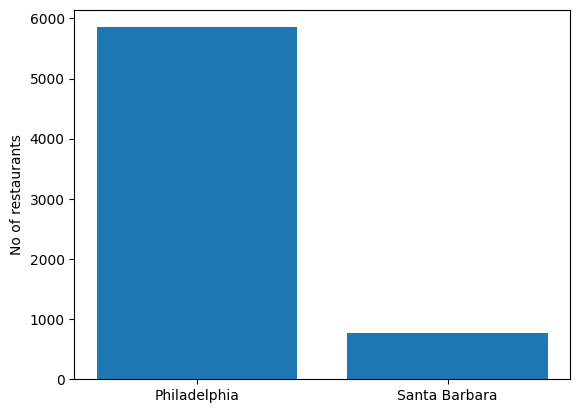

In [23]:
ax = plt.bar(
    ['Philadelphia', 'Santa Barbara'],
    [philly_restaurants.shape[0], santa_barbara_restaurants.shape[0]]
)
plt.ylabel("No of restaurants")
plt.show()

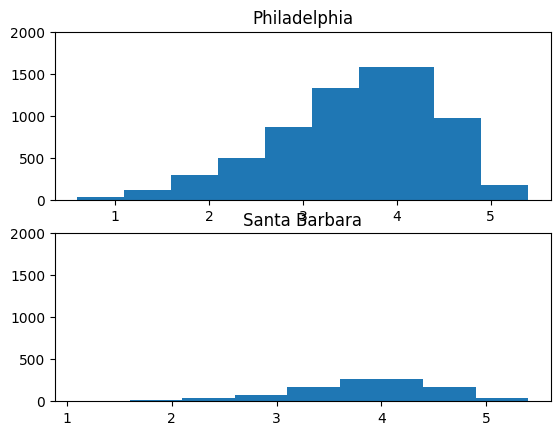

In [31]:
philly_ratings = philly_restaurants.stars.value_counts()
sb_ratings = santa_barbara_restaurants.stars.value_counts()

fig, axs = plt.subplots(2)
axs[0].bar(philly_ratings.index, philly_ratings.values)
axs[0].set_title('Philadelphia')
axs[0].set_ylim(0, 2000)
axs[1].bar(sb_ratings.index, sb_ratings.values)
axs[1].set_title('Santa Barbara')
axs[1].set_ylim(0, 2000)
plt.show()

# If execution times are really long we can go with Santa Barbara else Philadelphia

In [32]:
from wordcloud import WordCloud

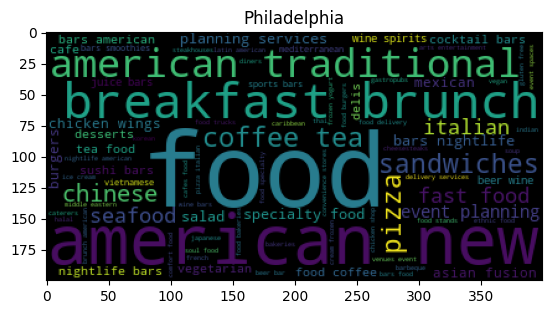

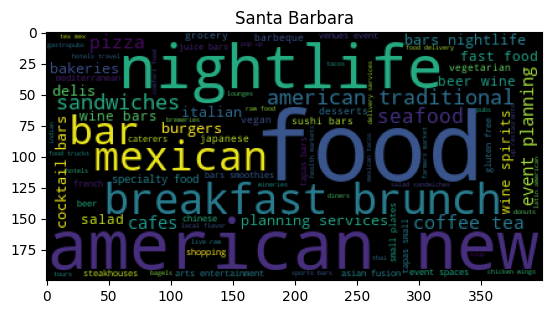

In [50]:
word_list = ""
for val in philly_restaurants.categories:
    tokens = str(val).split(',')
    for token in tokens:
        if token.strip().lower() != 'restaurants':
            word_list += "".join(token.strip().lower()) + " "
    
wc = WordCloud(stopwords=set('restaurants'))
img = wc.generate(word_list)
plt.imshow(img)
plt.title("Philadelphia")
plt.show()

word_list = ""
for val in santa_barbara_restaurants.categories:
    tokens = str(val).split(',')
    for token in tokens:
        if token.strip().lower() != 'restaurants':
            word_list += "".join(token.strip().lower()) + " "
    
wc = WordCloud(stopwords=set('restaurants'))
img = wc.generate(word_list)
plt.imshow(img)
plt.title("Santa Barbara")
plt.show()

In [53]:
philly_restaurants.to_csv(r'philadelphia_restaurants.csv', index=None)

In [54]:
santa_barbara_restaurants.to_csv(r'santa_barbara_restaurants.csv', index=None)

# Filtering reviews for Philadelphia

In [66]:
philly_reviews = pd.DataFrame()

chunks = pd.read_json(
    r'/Users/ritwickmanatkar/Downloads/yelp_dataset/yelp_academic_dataset_review.json', 
    lines=True, 
    chunksize = 1000
)
for chunk in chunks:
    temp = chunk[chunk.business_id.isin(list(philly_restaurants.business_id))]
    philly_reviews = pd.concat([philly_reviews, temp])

philly_reviews.shape

(687289, 9)

In [68]:
philly_reviews.to_json('philadelpia_reviews.json')

In [7]:
santa_barbara_reviews = pd.DataFrame()

chunks = pd.read_json(
    r'/Users/ritwickmanatkar/Downloads/yelp_dataset/yelp_academic_dataset_review.json', 
    lines=True, 
    chunksize = 1000
)
for chunk in chunks:
    temp = chunk[chunk.business_id.isin(list(santa_barbara_restaurants.business_id))]
    santa_barbara_reviews = pd.concat([santa_barbara_reviews, temp])

santa_barbara_reviews.shape

(162283, 9)

In [18]:
santa_barbara_reviews.to_json('santa_barbara_reviews.json', orient='records', index=False)

In [17]:
santa_barbara_reviews.to_dict('records')

[{'review_id': 'pUycOfUwM8vqX7KjRRhUEA',
  'user_id': '59MxRhNVhU9MYndMkz0wtw',
  'business_id': 'gebiRewfieSdtt17PTW6Zg',
  'stars': 3,
  'useful': 0,
  'funny': 0,
  'cool': 0,
  'text': "Had a party of 6 here for hibachi. Our waitress brought our separate sushi orders on one plate so we couldn't really tell who's was who's and forgot several items on an order. I understand making mistakes but the restaraunt was really quiet so we were kind of surprised. Usually hibachi is a fun lively experience and our  cook  said maybe three words, but he cooked very well his name was Francisco. Service was fishy, food was pretty good, and im hoping it was just an off night here. But for the money I wouldn't go back.",
  'date': Timestamp('2016-07-25 07:31:06')},
 {'review_id': 'L0jv8c2FbpWSlfNC6bbUEA',
  'user_id': 'bFPdtzu11Oi0f92EAcjqmg',
  'business_id': 'IDtLPgUrqorrpqSLdfMhZQ',
  'stars': 5,
  'useful': 0,
  'funny': 0,
  'cool': 0,
  'text': 'What a great addition to the Funk Zone!  Grab a 

# Filtering the photos

In [19]:
photo_data = pd.read_json(
    r'/Users/ritwickmanatkar/Downloads/yelp_photos/photos.json', 
    lines=True
)

# philly_photos = photo_data[photo_data.business_id.isin(list(philly_restaurants.business_id))]
santa_barbara_photos = photo_data[photo_data.business_id.isin(list(santa_barbara_restaurants.business_id))]

In [20]:
# philly_photos.shape

In [21]:
santa_barbara_photos.shape

(5320, 4)

In [22]:
# philly_photos.to_json('philadelphia_photos.json', orient='records', index=False)
santa_barbara_photos.to_json('santa_barbara_photos.json', index=False, orient='records')

## Tips Data

In [23]:
tips_data = pd.read_json(
    r'/Users/ritwickmanatkar/Downloads/yelp_dataset/yelp_academic_dataset_tip.json', 
    lines=True
)

santa_barbara_tips = tips_data[tips_data.business_id.isin(list(santa_barbara_restaurants.business_id))]
santa_barbara_tips.shape

(19150, 5)

In [24]:
santa_barbara_tips.to_json('santa_barbara_tips.json', index=False, orient='records')